# Сортировки и поиски

## Сарасбати Даниэла Брасалес Вивас  нммбд-03-22

In [25]:
import math

In [18]:
def Linear_search(arr, num):
    position = -1
    for position, element in enumerate(arr):
        if element == num:
            return position
    return position

In [21]:
def Binary_search(arr, num):
    low = 0
    high = len(lista)-1  
    center = (low + high)//2
    while low<=high:
        if arr[center] == num:
            return center
        elif arr[center]< num:   
            low = center + 1
        else:                       
            high = center - 1 
        center = (low + high)//2
    return -1  

In [26]:
def Jump_search(arr, num):
    n = len(arr)
    step = int(math.sqrt(n))
    prev = 0
    while arr[min(step, n)-1] < num:
        prev = step
        step += int(math.sqrt(n))
        if prev >= n:
            return -1
    while arr[prev] < num:
        prev += 1
        if prev == min(step, n):
            return -1
    if arr[prev] == num:
        return prev
    return -1

In [5]:
def Interpolation_search(arr, num):
    low, high = 0, len(arr) - 1
    while low <= high and arr[low] <= num <= arr[high]:
        pos = low + int(((num - arr[low]) * (high - low)) / (arr[high] - arr[low]))
        if arr[pos] == num:
            return pos
        elif arr[pos] < num:
            low = pos + 1
        else:
            high = pos - 1
    return -1

In [23]:
def Exponential_search(arr, num):
    if arr[0] == num:
        return 0
    idx = 1
    while idx < len(arr) and arr[idx] <= num:
        idx *= 2
    return Binary_search(arr[:min(idx, len(arr))], num)

## Задача 1

Проведите анализ скорости работы всех рассмотренных алгоритмов поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000). В качестве искомого возьмите элемент, индекс которого будет 5. 

In [13]:
import random
import numpy as np

In [14]:
array = np.random.randint(1,1000, 100)
array = np.sort(array)

In [16]:
searched_value = 5

In [15]:
array

array([ 21,  21,  25,  50, 111, 135, 141, 144, 146, 155, 157, 170, 173,
       182, 192, 211, 217, 229, 230, 234, 242, 264, 266, 268, 272, 277,
       304, 314, 314, 317, 326, 330, 336, 337, 340, 340, 348, 379, 389,
       391, 400, 409, 413, 424, 441, 441, 445, 455, 461, 468, 472, 473,
       485, 501, 506, 508, 518, 524, 530, 569, 617, 629, 701, 710, 711,
       730, 747, 755, 768, 773, 779, 779, 782, 782, 803, 816, 823, 838,
       857, 859, 859, 860, 861, 895, 901, 907, 908, 925, 931, 935, 938,
       939, 944, 945, 958, 983, 983, 985, 994, 997])

In [69]:
linear_time5 = %timeit -o Linear_search(array,searched_value)
binary_time5 = %timeit -o Binary_search(array,searched_value)
jump_time5 = %timeit -o Jump_search(array,searched_value)
interpolation_time5 = %timeit -o Interpolation_search(array,searched_value)
exponential_time5 = %timeit -o Exponential_search(array,searched_value)

797 ns ± 55 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
3.6 µs ± 942 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.51 µs ± 580 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.27 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.77 µs ± 196 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Задача 2

Проведите анализ скорости работы всех рассмотренных алгоритмов поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000). В качестве искомого возьмите элемент, индекс которого будет 95.

In [30]:
searched_value2 = 95

In [70]:
linear_time95 = %timeit -o Linear_search(array,searched_value2)
binary_time95 = %timeit -o Binary_search(array,searched_value2)
jump_time95 = %timeit -o Jump_search(array,searched_value2)
interpolation_time95 = %timeit -o Interpolation_search(array,searched_value2)
exponential_time95 = %timeit -o Exponential_search(array,searched_value2)

17.6 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.06 µs ± 87.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.4 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.04 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
5.32 µs ± 880 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Задача 3

Сделайте выводы по скорости работы алгоритмов поиска в разных условиях из 1 и 2 задач.Постройте 2 графика сравнения этих скоростей.

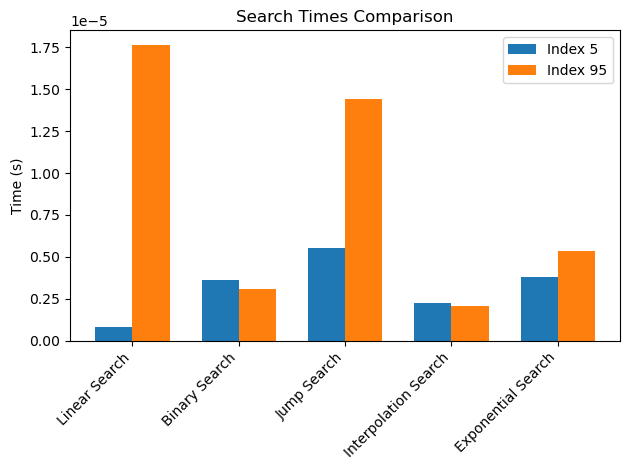

In [80]:
labels = ['Linear Search', 'Binary Search','Jump Search','Interpolation Search', 'Exponential Search']
times_5 = [linear_time5.average, binary_time5.average, jump_time5.average, interpolation_time5.average, exponential_time5.average]
times_95 = [linear_time95.average, binary_time95.average, jump_time95.average, interpolation_time95.average, exponential_time95.average]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, times_5, width, label='Index 5')
rects2 = ax.bar(x + width/2, times_95, width, label='Index 95')

ax.set_ylabel('Time (s)')
ax.set_title('Search Times Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()

Мы можем заметить, что если искомое значение находится в начале массива, то линейный поиск занимает меньше времени, однако если мы ищем значение в конце массива, то как линейный, так и прыжковый поиск занимают гораздо больше времени. Поиск бинарный и интерполяционный остаются примерно на одном уровне.

## Задача 4

Проведите анализ скорости работы всех рассмотренных алгоритмов сортировки на массиве, состоящем из 100 значений (значения массива должны быть последовательными от 1 до 100).

In [7]:
def bubble(array):
    length=len(array)-1

    for i in range(0,length):               
        for j in range(0,length):
            if array[j]>array[j+1]:
                aux=array[j]
                array[j]=array[j+1]
                array[j+1]=aux
    return array

In [38]:
def insert(array):
    lenght=len(array)

    for i in range(1,lenght):
        i_value= array[i]
        i_index= i

        while i_index > 0 and array[i_index - 1] > i_value:
            array[i_index]=array[i_index - 1]
            i_index -= 1
        array[i_index] = i_value
    return array

In [39]:
def selection(array):
    length=len(array)-1

    for i in range(0,length):
        min_index = i
        min_value = array[min_index]

        for j in range(i,length):    

            if min_value> array[j+1]:
                min_value=array[j+1]
                min_index= j+1
        if min_index != i:
            aux=array[i]
            array[i]=array[min_index]
            array[min_index]=aux

    return array

In [40]:
def merge(left, right):
    sorted_array = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_array.append(left[i])
            i += 1
        else:
            sorted_array.append(right[j])
            j += 1

    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])
    return sorted_array

def merge_sort(array):
    if len(array) <= 1:
        return array

    mid = len(array) // 2
    left_half = merge_sort(array[:mid])
    right_half = merge_sort(array[mid:])

    return merge(left_half, right_half)

In [41]:
def quick_sort(array):
    if len(array) <= 1:
        return array

    pivot = array[len(array) // 2]
    less_than_pivot = [x for x in array if x < pivot]
    equal_to_pivot = [x for x in array if x == pivot]
    greater_than_pivot = [x for x in array if x > pivot]

    return quick_sort(less_than_pivot) + equal_to_pivot + quick_sort(greater_than_pivot)


In [62]:
array1 = np.arange(1, 101)

In [63]:
bubble_sort_time = %timeit -o bubble(array1.copy())
insertion_sort_time = %timeit -o insert(array1.copy())
selection_sort_time = %timeit -o selection(array1.copy())
merge_sort_time = %timeit -o merge_sort(array1.copy())
quick_sort_time = %timeit -o quick_sort(array1.copy())

2.21 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
31.1 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
821 µs ± 131 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
300 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
245 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Задача 5

Проведите анализ скорости работы всех рассмотренных алгоритмов сортировки на массиве, состоящем из 100 значений (значения массива должны иметь обратную последовательность от 100 до 1).

In [77]:
array_reverse = np.arange(100,0, -1)

In [78]:
bubble_time = %timeit -o bubble(array_reverse.copy())
insertion_time = %timeit -o insert(array_reverse.copy())
selection_time = %timeit -o selection(array_reverse.copy())
merge_sort_time1 = %timeit -o merge_sort(array_reverse.copy())
quick_sort_time1 = %timeit -o quick_sort(array_reverse.copy())


4.55 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.1 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.28 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
297 µs ± 6.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
204 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Задача 6

Сделайте выводы по скорости работы алгоритмов сортировки в разных условиях из 4 и 5 задач.Постройте 2 графика сравнения этих скоростей.

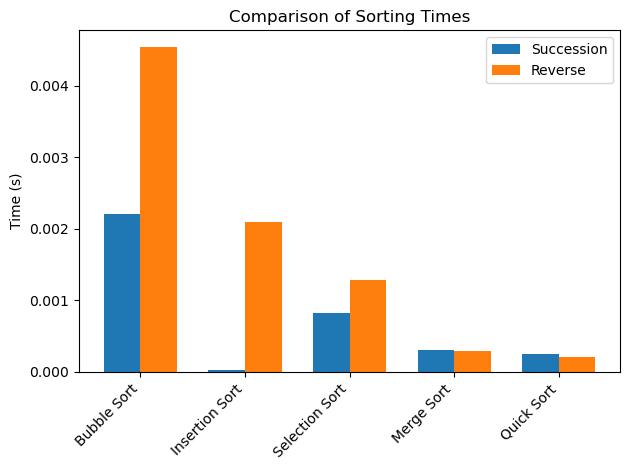

In [79]:
labels = ['Bubble Sort', 'Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort']
succession = [bubble_sort_time.average, insertion_sort_time.average, selection_sort_time.average, merge_sort_time.average, quick_sort_time.average]
reverse = [bubble_time.average, insertion_time.average, selection_time.average, merge_sort_time1.average, quick_sort_time1.average]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, succession, width, label='Succession')
rects2 = ax.bar(x + width/2, reverse, width, label='Reverse')

ax.set_ylabel('Time (s)')
ax.set_title('Comparison of Sorting Times')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()

Для упорядоченной последовательности предпочтительно использовать сортировку вставками. Сортировка слиянием и быстрая сортировка дают очень похожие результаты.